<a href="https://colab.research.google.com/github/Dananjali/Churn-Prediction-Model-Comparison/blob/main/Churn_Prediction_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Importing Dataset

In [31]:
df = pd.read_csv('Churn_Modelling.csv')
df.head() # View the first few rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
df.info() # Check basic info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [33]:
df.isnull().sum() # Check for any missing values

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [34]:
df[df.duplicated()] # Check for any duplicate rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# Encoding Data

In [35]:
# Convert Gender from text to numerical using LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# One-hot encode the Geography column (drop one column to avoid dummy variable trap)
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [36]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


Visualizing Data

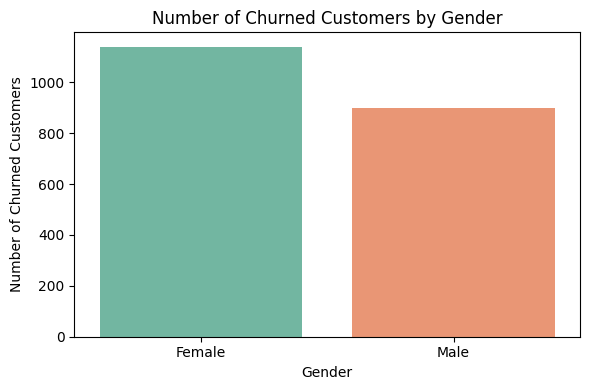

In [38]:
# Visualizing Gender vs Churn

gender_churn_df = churned['Gender_Label'].value_counts().reset_index()
gender_churn_df.columns = ['Gender', 'Churned_Count']

# Plot the bar chart with hue set properly to avoid the warning
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_churn_df, x='Gender', y='Churned_Count', hue='Gender', palette='Set2', legend=False)

plt.title('Number of Churned Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Churned Customers')
plt.tight_layout()
plt.show()

In [9]:
# Selecting relevant features for training
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']
X=df[features]
y=df['Exited']

# Splitting data into train set and test set

In [10]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [11]:
scaler =  StandardScaler() # Standardize the feature values
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train[:5], X_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.02583358, -1.01960511,  1.72572

# Random Forest Classifier

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [16]:
# Evaluate performance
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [17]:
print(cm)
print(class_report)
print(accuracy)

[[1551   56]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8665


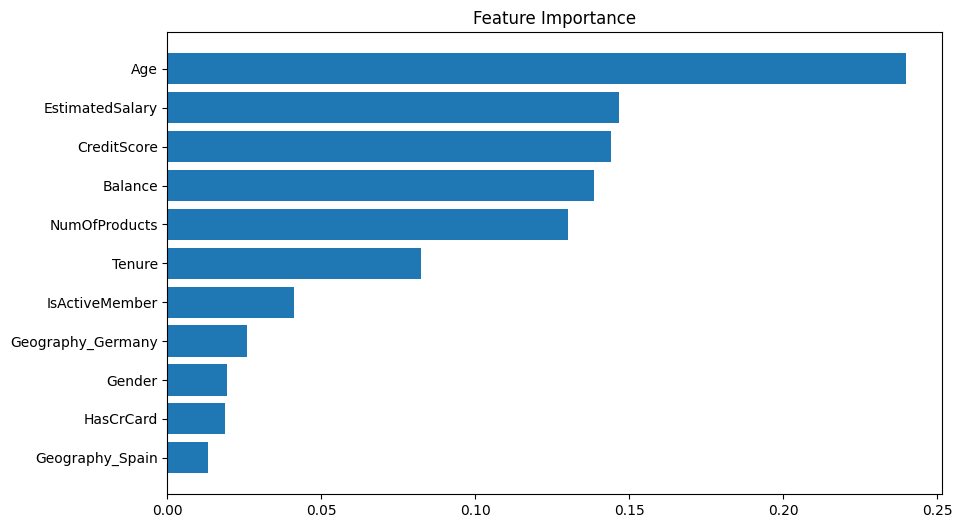

In [21]:
# Visualizing feature importance for Random Forest
importances = model.feature_importances_
indices= np.argsort(importances)
names = [features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

# Logistic Regression

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(cm_log_reg)
print(class_report_log_reg)
print(accuracy_log_reg)

[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

0.811


# SVM

In [39]:
# Support Vector Machine
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
cm_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm, zero_division=0)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(cm_svm, class_report_svm, accuracy_svm)

[[1607    0]
 [ 393    0]]               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000
 0.8035


# k-NN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
cm_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(cm_knn, class_report_knn, accuracy_knn)

[[1514   93]
 [ 247  146]]               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000
 0.83


# Comparing accuracy of the models

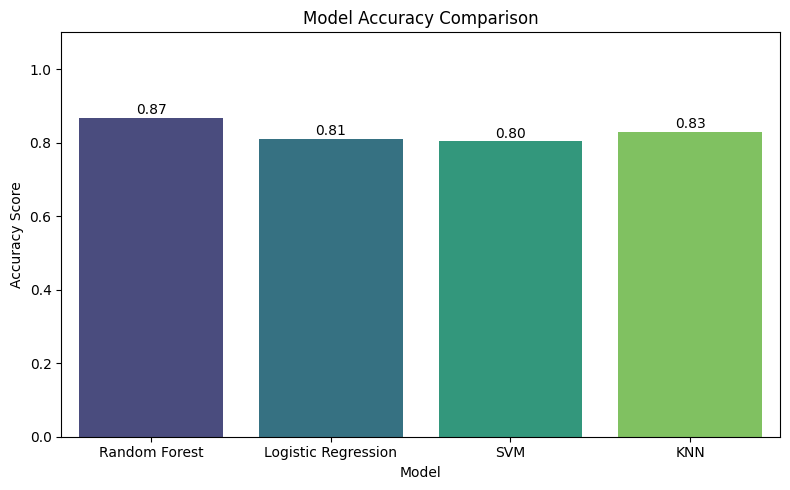

In [40]:
# Convert the accuracy dictionary to a DataFrame
accuracy_df = pd.DataFrame({
    'Model': list(model_accuracies.keys()),
    'Accuracy': list(model_accuracies.values())
})

# Plot the comparison bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=accuracy_df, x='Model', y='Accuracy', hue='Model', palette='viridis', legend=False)

# Add value labels on top of bars (optional)
for i, acc in enumerate(accuracy_df['Accuracy']):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()
